In [2]:
from langgraph.graph import StateGraph, START, END
from langchain_openai import ChatOpenAI
from typing import TypedDict, Literal
from dotenv import load_dotenv
from pydantic import BaseModel, Field

In [3]:
load_dotenv()

True

In [4]:
model = ChatOpenAI(model = 'gpt-4o-mini')

In [5]:
class SentimentSchema(BaseModel):

    sentiment: Literal["positive", "negative"] = Field(description = 'Sentiment of the review')

In [6]:
structured_model = model.with_structured_output(SentimentSchema)

In [16]:
prompt = 'What is the sentiment of the following review- The software is too good'
structured_model.invoke(prompt).sentiment

'positive'

In [10]:
class ReviewState(TypedDict):
    review: str
    sentiment: Literal["positive", "negative"]
    diagnosis: dict
    response: str


In [ ]:
def find_sentiment(state: ReviewState):
    prompt = f'For the following review, find out the sentiment \n state{["review"]}'
    sentiment = structured_model.invoke(prompt).sentiment

    return {'sentiment': sentiment}

def check_sentiment(state: ReviewState) -> Literal["positive_response", "run_diagnosis"]:
    if state['sentiment'] == 'positive':
        return 'positive_response'
    else:
        return 'run_diagnosis'
        

In [13]:
graph = StateGraph(ReviewState)

graph.add_node('find_sentiment', find_sentiment)

graph.add_edge(START, 'find_sentiment')
graph.add_edge('find_sentiment', END)

workflow = graph.compile()

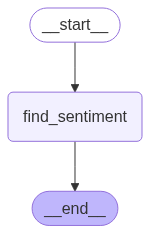

In [14]:
workflow

In [17]:
initial_state = {
    'review': 'The product was so good'
}

workflow.invoke(initial_state)

{'review': 'The product was so good', 'sentiment': 'positive'}